In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [6]:
train_dir = '/content/drive/MyDrive/asl dataset/new_train'
test_dir = '/content/drive/MyDrive/asl dataset/new_test'

In [7]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (224, 224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 13257 images belonging to 29 classes.
Found 1450 images belonging to 29 classes.


In [9]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/MyDrive/asl dataset/new_train')

Found 13257 files belonging to 29 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [10]:
classes = dataset.class_names
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'del',
 'nothing',
 'space']

In [11]:
base_model = VGG16(
    weights = 'imagenet',
    include_top = False,
    input_shape = (224, 224, 3)
)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers[:-4]:
    layer.trainable = False
for layer in base_model.layers[-4:]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation = 'relu'),
    Dropout(0.5),
    Dense(29, activation = 'softmax')
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
model.compile(tf.keras.optimizers.Adam(learning_rate = 0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    epochs = 25,
    validation_data = test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 5870s 14s/step - accuracy: 0.2972 - loss: 2.4977 - val_accuracy: 0.8441 - val_loss: 0.5248
Epoch 2/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 227s 547ms/step - accuracy: 0.8234 - loss: 0.5932 - val_accuracy: 0.9221 - val_loss: 0.2984
Epoch 3/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 226s 545ms/step - accuracy: 0.8961 - loss: 0.3445 - val_accuracy: 0.9386 - val_loss: 0.2202
Epoch 4/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 262s 544ms/step - accuracy: 0.9227 - loss: 0.2491 - val_accuracy: 0.9434 - val_loss: 0.1799
Epoch 5/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 224s 540ms/step - accuracy: 0.9353 - loss: 0.2113 - val_accuracy: 0.9490 - val_loss: 0.1484
Epoch 6/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 223s 538ms/step - accuracy: 0.9530 - loss: 0.1448 - val_accuracy: 0.9579 - val_loss: 0.1397
Epoch 7/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 224s 539ms/step - accuracy: 0.9615 - loss: 0.1232 - val_accuracy: 0.9614 - val_loss: 0.1210
Epoch 8/25
415/415 ━━━━━━━━━━━━━━━━━━━━ 228s 549ms/step - accuracy: 0.9699 - 

In [14]:
hist = history.history
hist.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [15]:
hist['val_accuracy'][-1]

0.9765517115592957

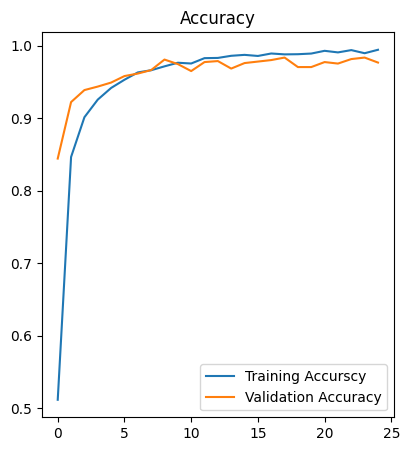

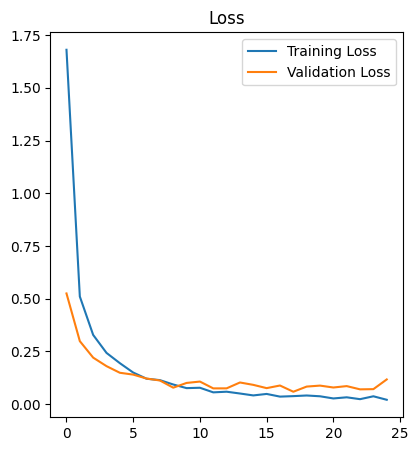

In [16]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accurscy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure(figsize = (10, 5))
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

In [17]:
def spell_word(image_paths):
  word = ""
  for image_path in image_paths:
    img = tf.keras.preprocessing.image.load_img(image_path, target_size = (224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.keras.applications.vgg16.preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis = 0)
    prediction = model.predict(img_array)
    label = classes[np.argmax(prediction)]
    if label == 'space':
      word += ' '
    elif label == 'del':
      word = word[:-1] if word else word
    elif label == 'nothing':
      continue
    else:
      word += label
    print(f"Image: {image_path.split('/')[-1]}, Predicted: {label}")
  return word

In [18]:
test_images = ['/content/drive/MyDrive/asl dataset/new_test/H/H (1235).jpg',
               '/content/drive/MyDrive/asl dataset/new_test/I/I (1561).jpg'
]
spelled_word = spell_word(test_images)
print("Spelled Word:", spelled_word)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Image: H (1235).jpg, Predicted: H
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Image: I (1561).jpg, Predicted: I
Spelled Word: HI


In [19]:
test_images = ['/content/drive/MyDrive/asl dataset/new_test/O/O (1261).jpg',
               '/content/drive/MyDrive/asl dataset/new_test/space/space (2375).jpg',
               '/content/drive/MyDrive/asl dataset/new_test/M/M (1478).jpg',
               '/content/drive/MyDrive/asl dataset/new_test/nothing/nothing1291.jpg',
               '/content/drive/MyDrive/asl dataset/new_test/G/G (1057).jpg',
               '/content/drive/MyDrive/asl dataset/new_test/Y/Y (1193).jpg',
               '/content/drive/MyDrive/asl dataset/new_test/del/del (1191).jpg'
]
spelled_word = spell_word(test_images)
print("Spelled Word:", spelled_word)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: O (1261).jpg, Predicted: O
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: space (2375).jpg, Predicted: space
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Image: M (1478).jpg, Predicted: M
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Image: G (1057).jpg, Predicted: G
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Image: Y (1193).jpg, Predicted: Y
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Image: del (1191).jpg, Predicted: del
Spelled Word: O MG
